In [1]:
%matplotlib inline
### import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

In [2]:
#read Csv
data = pd.read_csv('health care diabetes.csv')

In [3]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Week 1

### Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [4]:
#check for null
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:

Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [7]:
data['Glucose'].value_counts().head(7)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

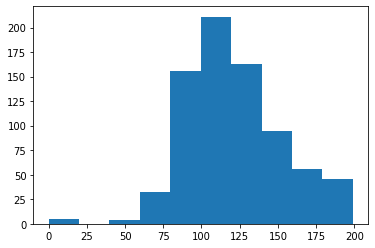

In [8]:
plt.hist(data['Glucose'])

In [9]:
data['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

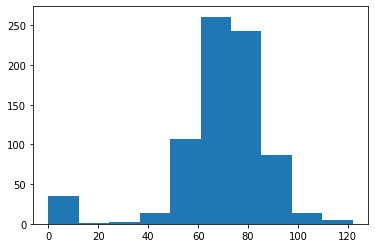

In [10]:
plt.hist(data['BloodPressure'])

In [11]:
data['SkinThickness'].value_counts().head(7)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
Name: SkinThickness, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

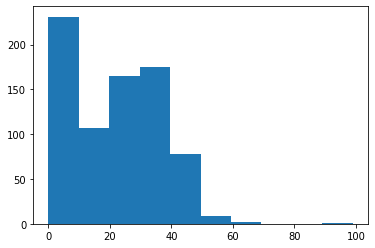

In [12]:
plt.hist(data['SkinThickness'])

In [13]:
data['Insulin'].value_counts().head(7)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
Name: Insulin, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

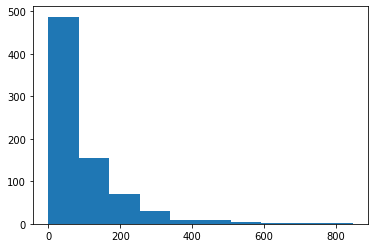

In [14]:
plt.hist(data['Insulin'])

In [15]:
data['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

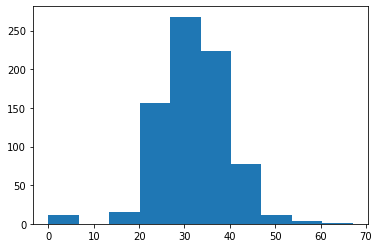

In [16]:
plt.hist(data['BMI'])

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Week 2

### Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 <a list of 1 Patch objects>)

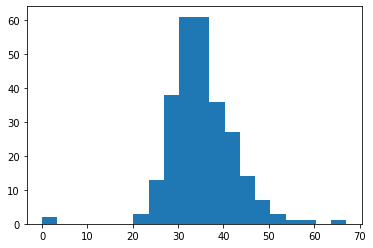

In [18]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

In [19]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
30.5    5
32.0    5
31.2    5
32.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 1 Patch objects>)

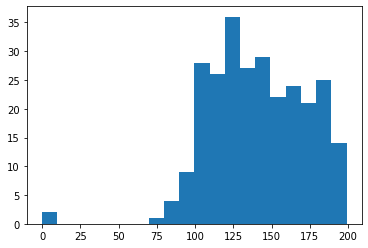

In [20]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

In [21]:
Positive['Glucose'].value_counts().head(7)

125    7
158    6
128    6
115    6
129    6
146    5
162    5
Name: Glucose, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 <a list of 1 Patch objects>)

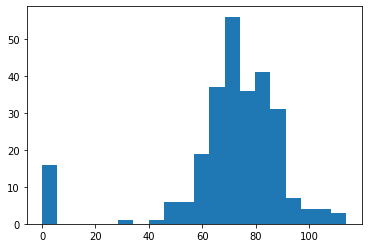

In [22]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

In [23]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([88.,  1.,  4., 10., 18., 30., 41., 34., 23., 15.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 1 Patch objects>)

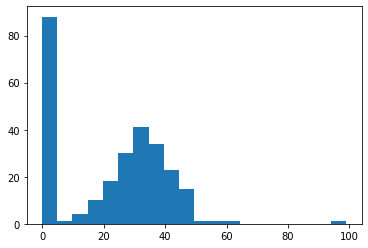

In [24]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

In [25]:
Positive['SkinThickness'].value_counts().head(7)

0     88
32    14
33     9
30     9
39     8
35     8
36     8
Name: SkinThickness, dtype: int64

(array([141.,   6.,  23.,  33.,  24.,  12.,   7.,   7.,   2.,   1.,   1.,
          5.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 <a list of 1 Patch objects>)

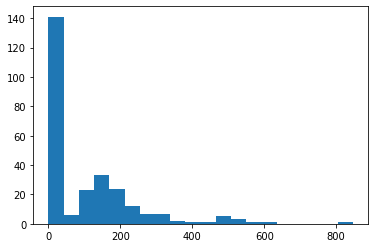

In [26]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

In [27]:
Positive['Insulin'].value_counts().head(7)

0      138
130      6
180      4
156      3
175      3
194      2
125      2
Name: Insulin, dtype: int64

In [28]:
#Scatter plot

In [29]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

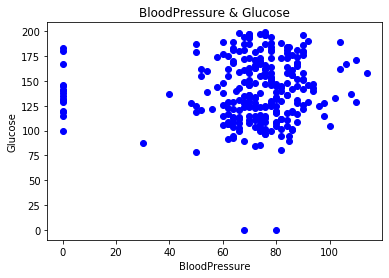

In [30]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

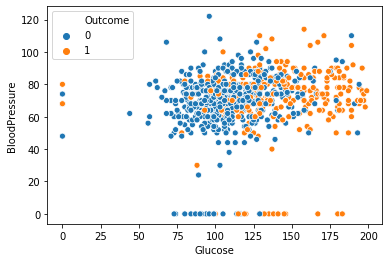

In [31]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

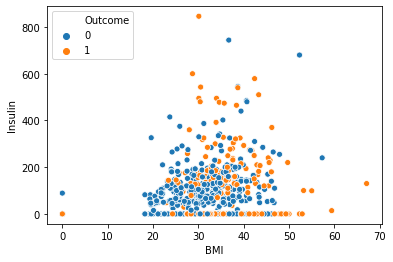

In [32]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

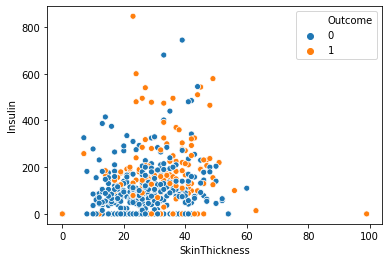

In [33]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

In [34]:
### correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


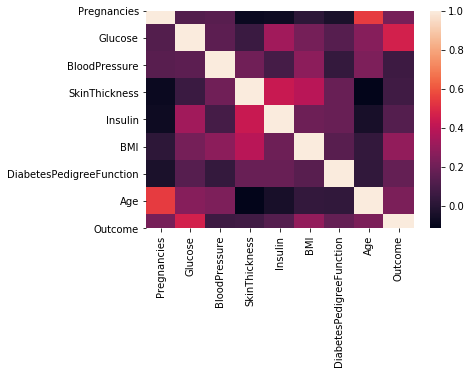

In [38]:

### create correlation heat map
sns.heatmap(data.corr())

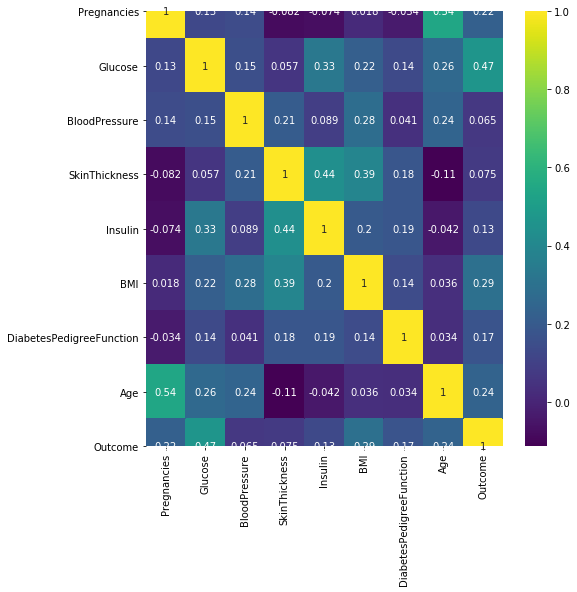

In [39]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')  ### gives correlation value

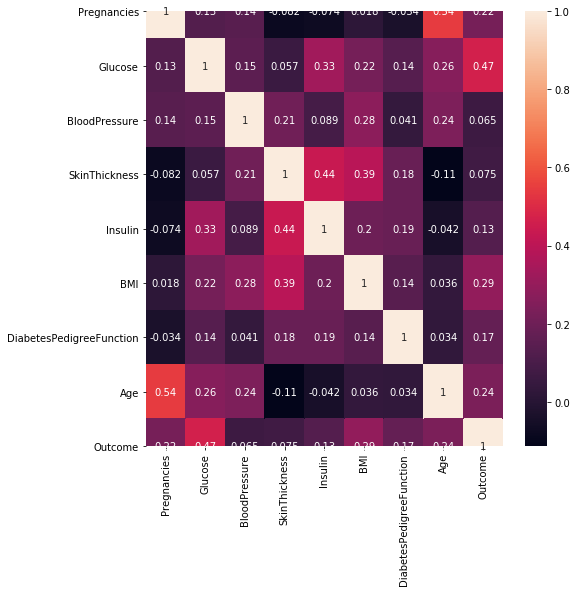

In [40]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)  ### gives correlation value

# Logistic Regression and model building

## Week 3

###  Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [41]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

In [43]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [44]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train) 

C:\Users\cugagu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7801302931596091
0.7337662337662337


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[450,  50],
       [126, 142]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       500
           1       0.74      0.53      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.73       768
weighted avg       0.77      0.77      0.76       768



AUC: 0.834


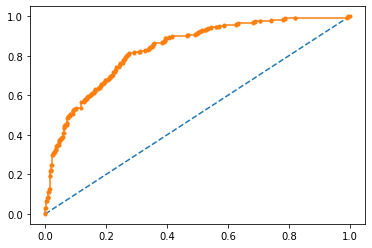

In [48]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')



In [49]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Using Decision Tree


In [50]:
model3.score(X_train,y_train)

0.8289902280130294

In [51]:

model3.score(X_test,y_test)

0.7662337662337663

In [52]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Using Random Forest 


In [53]:
model4.score(X_train,y_train)

0.99185667752443

In [54]:
model4.score(X_test,y_test)

0.7272727272727273

In [55]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Using Support Vector Classifier


In [56]:
model5.score(X_train,y_train)

1.0

In [57]:
model5.score(X_test,y_test)

0.6168831168831169

In [58]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

AUC: 0.836
True Positive Rate - [0.         0.06716418 0.23880597 0.44776119 0.60074627 0.75373134
 0.88059701 0.98507463 1.        ], False Positive Rate - [0.    0.    0.02  0.056 0.12  0.248 0.428 0.668 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

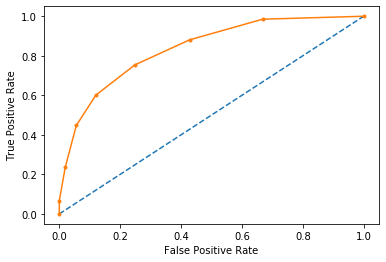

In [59]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


f1=0.617 auc=0.728 ap=0.729


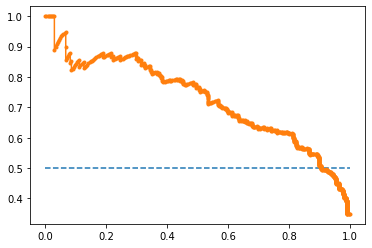

In [60]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.658 auc=0.752 ap=0.709


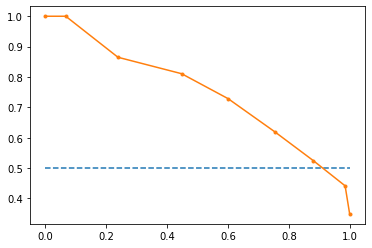

In [61]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.712 auc=0.812 ap=0.765


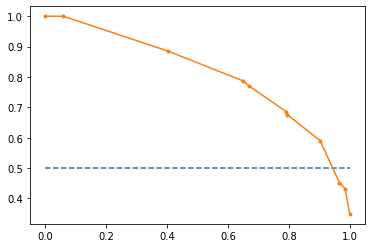

In [62]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.911 auc=0.964 ap=0.955


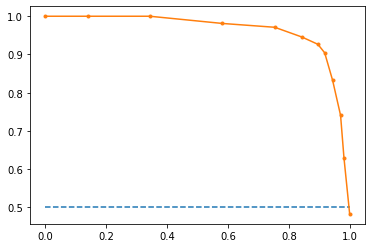

In [63]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')